In [1]:
"""
Null Hypothesis : Pay does not increase in 2015
Alternate Hypothesis: It increases
Technique : Two sample T - test
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import math
from scipy import stats
from scipy.stats import distributions as dists 

payroll = pd.read_csv("processed_data.csv")

c:\users\sweta\appdata\local\programs\python\python36-32\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (4,24,28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [24]:
def twosamplettest(payroll,year1, year2, attribute):
    payroll = payroll[payroll.employment_type == 'Full Time']
    payroll_2014 = payroll[payroll.year ==year1]
    payroll_2015 = payroll[payroll.year ==year2]
    payroll_2014 = payroll_2014[payroll_2014[attribute] > 0]
    payroll_2015 = payroll_2015[payroll_2015[attribute] > 0]
    # print(len(payroll_2014),len(payroll_2015), len(payroll_2016))

    #Assume Normality as per CLT - Pre-reqisite of Paired T test

    #Population Statistics
    payroll_2014_pop_mean = payroll_2014[attribute].mean()
    payroll_2014_std = statistics.stdev(payroll_2014.total_payments)
    payroll_2014_list = payroll_2014[attribute].values
    # print(payroll_2014_pop_mean, payroll_2014_std)

    payroll_2015_pop_mean = payroll_2015[attribute].mean()
    payroll_2015_std = statistics.stdev(payroll_2015.total_payments)
    payroll_2015_list = payroll_2015[attribute].values

    # print(payroll_2015_pop_mean, payroll_2015_std)

    df1 = len(payroll_2014) + len(payroll_2015)-2 #Degree of Freedom

    t_denom_14_15 = math.sqrt(((payroll_2014_std**2)/len(payroll_2014))+((payroll_2015_std**2)/len(payroll_2015)))
    t_14_15 = (payroll_2014_pop_mean - payroll_2015_pop_mean)/t_denom_14_15
    print("T-statsistic = ", t_14_15)
    # print(stats.ttest_ind(payroll_2014_list, payroll_2015_list))

    tcritical = dists.t.ppf(1-(0.05), df1) 
    print("T-Critical(Upper-tail) = ",tcritical)
    tcrit= stats.ttest_ind(payroll_2014_list,payroll_2015_list)
    print("p-value = ",tcrit)
    if(t_14_15 > tcritical):
        print("Since ",t_14_15, " > ",tcritical,", We reject the Null Hypothesis and accept the alternate hypothesis which says that the ",attribute," increases in ",year2, "(as compared to",year1,").")
    else:
        print("We accept H0: ",attribute," does not increase in",year2, "(as compared to",year1,").")
    
   
    #Plotting the graph
    plt.figure(figsize=(20,10))
    payroll_2014.insert(0, 'ID', range(0, 0 + len(payroll_2014)))
    payroll_2015.insert(0, 'ID', range(0, 0 + len(payroll_2015)))
    plt.scatter(payroll_2014['ID'], payroll_2014[attribute],label = year1)
    plt.scatter(payroll_2015['ID'], payroll_2015[attribute],label = year2)
    plt.legend()
    plt.show()


c:\users\sweta\appdata\local\programs\python\python36-32\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (4,24,28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


T-statsistic =  -15.4686984025
T-Critical(Upper-tail) =  1.64486978808
p-value =  Ttest_indResult(statistic=-15.465392288431364, pvalue=6.9210732298435475e-54)
We accept H0:  total_payments  does not increase in 2014 (as compared to 2013 ).


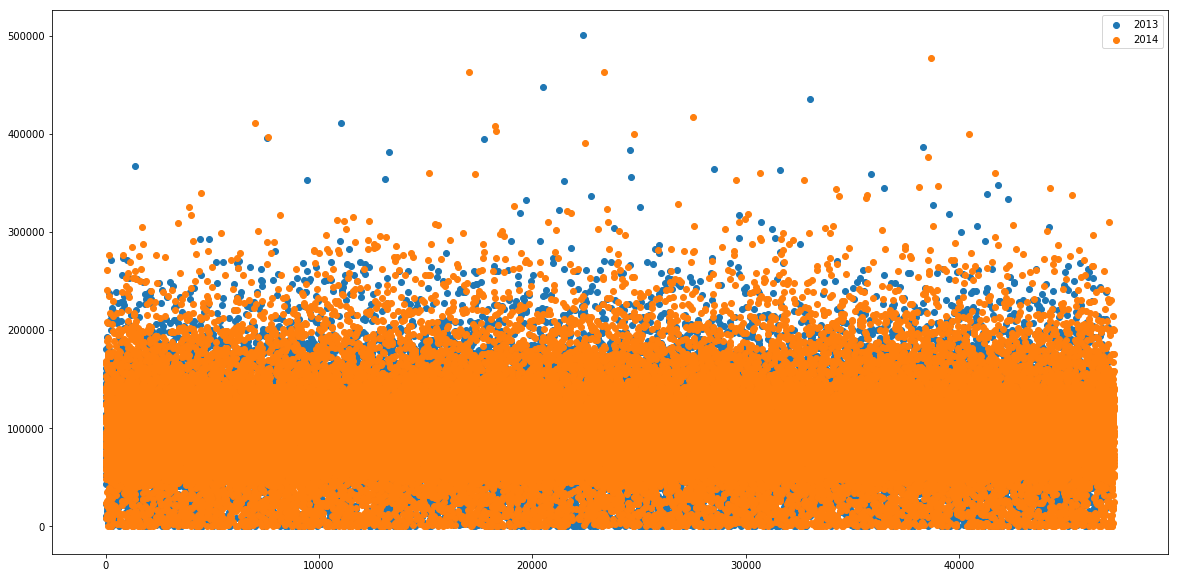

In [25]:
payroll = pd.read_csv("processed_data.csv")
twosamplettest(payroll,2013, 2014, 'total_payments')

T-statsistic =  -2.63777218549
T-Critical(Upper-tail) =  1.64486954879
p-value =  Ttest_indResult(statistic=-2.6354487026558968, pvalue=0.0084039668856912778)
We accept H0:  total_payments  does not increase in 2015 (as compared to 2014 ).


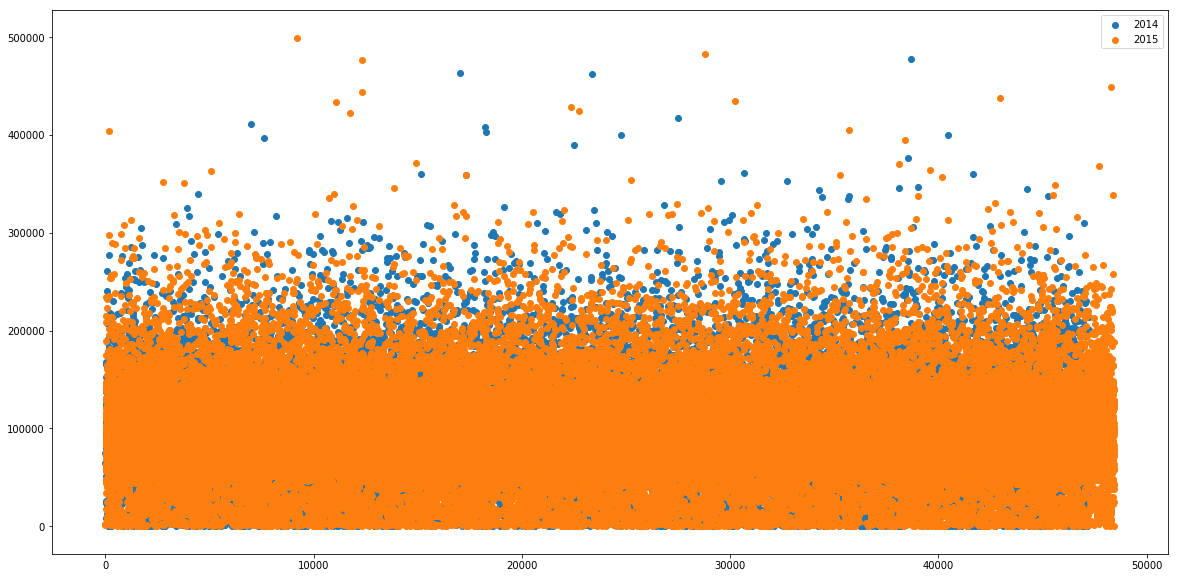

In [26]:
twosamplettest(payroll,2014, 2015, 'total_payments')

T-statsistic =  259.702885839
T-Critical(Upper-tail) =  1.64486433863
p-value =  Ttest_indResult(statistic=319.65616776115883, pvalue=0.0)
Since  259.702885839  >  1.64486433863 , We reject the Null Hypothesis and accept the alternate hypothesis which says that the  total_payments  increases in  2016 (as compared to 2015 ).


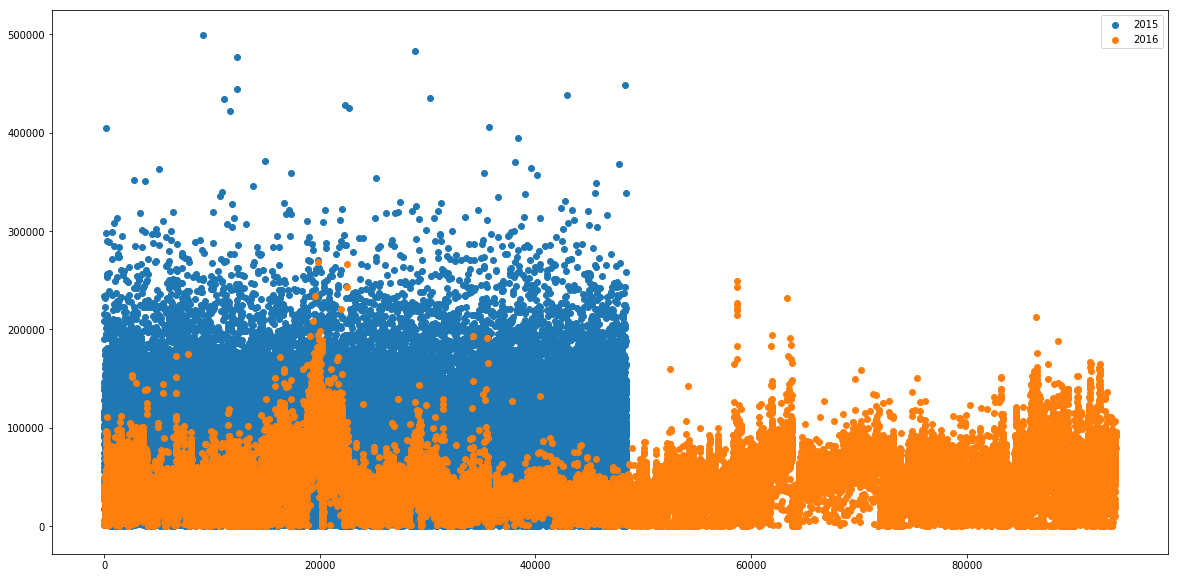

In [27]:
twosamplettest(payroll,2015, 2016, 'total_payments')

T-statsistic =  -1.75734048162
T-Critical(Upper-tail) =  1.64486978671
p-value =  Ttest_indResult(statistic=-29.500110216841367, pvalue=2.1208654585868112e-190)
We accept H0:  average_benefit_cost  does not increase in 2014 (as compared to 2013 ).


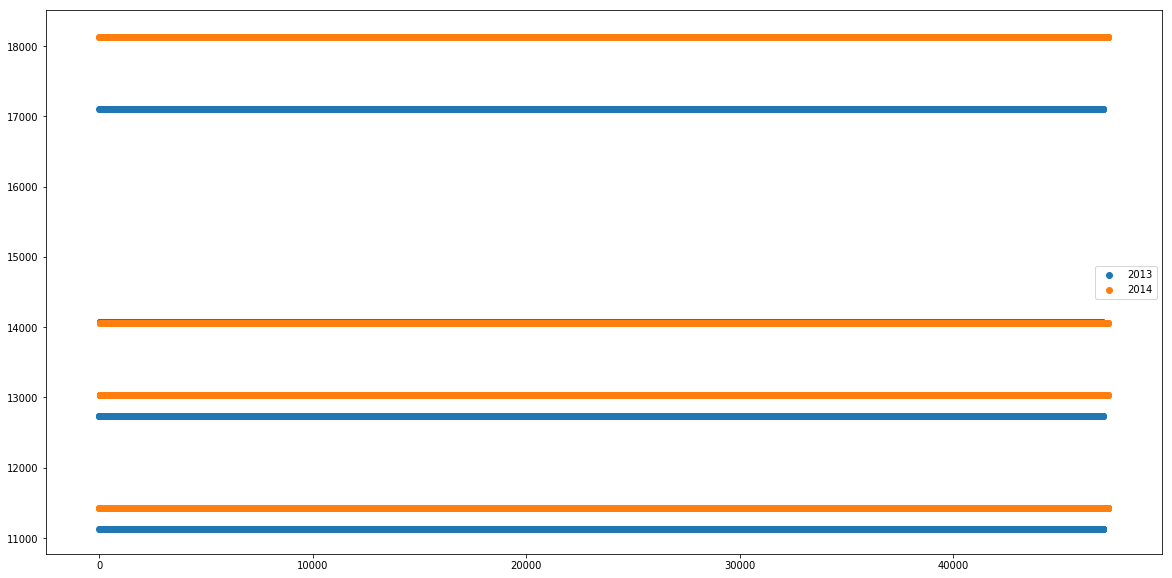

In [28]:
twosamplettest(payroll,2013, 2014, 'average_benefit_cost')

In [33]:
twosamplettest(payroll,2014, 2015, 'average_benefit_cost')

T-statsistic =  -0.537416536933
T-Critical(Upper-tail) =  1.64486954796
p-value =  Ttest_indResult(statistic=-8.7803647870749408, pvalue=1.6555966757741017e-18)
We accept H0:  average_benefit_cost  does not increase in 2015 (as compared to 2014 ).


MemoryError: In draw_path: Out of memory

In [34]:
twosamplettest(payroll,2015, 2016, 'average_benefit_cost')

MemoryError: 

In [11]:
def outlier_range(x):
    x = np.array(x)
    upper_q = np.percentile(x, 75)
    lower_q = np.percentile(x, 25)
    iqr = (upper_q - lower_q) * 1.5
    #print("IQR:",iqr," lower:",lower_q," upper:",upper_q)
    acceptable_range = (lower_q - iqr, upper_q + iqr)
    return acceptable_range

In [22]:
def pairedT_test(payroll,year1, year2, attribute):
    payroll_y1 = payroll[payroll.year ==year1]
    payroll_y2 = payroll[payroll.year ==year2]
    
    #Data Pre-processing
    payroll_y1 = payroll_y1[payroll_y1[attribute] != 0]
    payroll_y2 = payroll_y2[payroll_y2[attribute] != 0]
    
    clean_y1 = payroll_y1[attribute].values
    index = []
    for i in range(len(clean_y1)):
        if clean_y1[i] < -45098.666250000002 and clean_y1[i] > 209266.00375:
            index.append(i)
    clean_y1 = np.delete(clean_y1,index)
    
    clean_y2 = payroll_y2[attribute].values
    index = []
    for i in range(len(clean_y2)):
        if clean_y2[i] < -45098.666250000002 and clean_y2[i] > 209266.00375:
            index.append(i)
    clean_y2 = np.delete(clean_y2,index)
#     print(len(clean_y1),len(clean_y2))
    
    #find difference
    diff =[]
    m = min((len(clean_y1),len(clean_y2)))
    for i in range(min(len(clean_y1),len(clean_y2))):
        diff.append(abs(clean_y1[i]-clean_y2[i]))
    diff = np.array(diff)
    avg = np.mean(diff)
    std = np.std(diff)
#     print(std)
    pairedt = (avg*math.sqrt(len(diff)))/std
    print("Paired T-statistic = ", pairedt)
    tcritical = dists.t.ppf(1-(0.05)/2, len(diff)-1) 
    print("T-Critical = ",tcritical)
    print(len(clean_y1[:m]) == len(clean_y2[:m]))
    print("Scipy Results = ", stats.ttest_rel(clean_y1[:m],clean_y2[:m]))
    if pairedt > tcritical:
        print("H0 : Pay did not increase from 2014 to 2015, H0 Accepted.")
    else:
        print("H1 : Pay increases from 2014 to 2015, H0 Rejected. ")
    

In [23]:
pairedT_test(payroll,2014, 2015, 'total_payments')

Paired T-statistic =  271.950551236
T-Critical =  1.96000564367
True
Scipy Results =  Ttest_relResult(statistic=-9.0371747733609098, pvalue=1.65664019363063e-19)
H0 : Pay did not increase from 2014 to 2015, H0 Accepted.


In [10]:
payroll[payroll['year'] == 2015].shape

(59767, 35)

In [11]:
payroll[payroll['year'] == 2016].shape

(110914, 35)

T-statsistic =  35.5292349717
T-Critical(Upper-tail) =  1.64486989245
p-value =  Ttest_indResult(statistic=83.081314309639538, pvalue=0.0)
Since  35.5292349717  >  1.64486989245 , We reject the Null Hypothesis and accept the alternate hypothesis which says that the  overtime_pay  increases in  2016 (as compared to 2015 ).


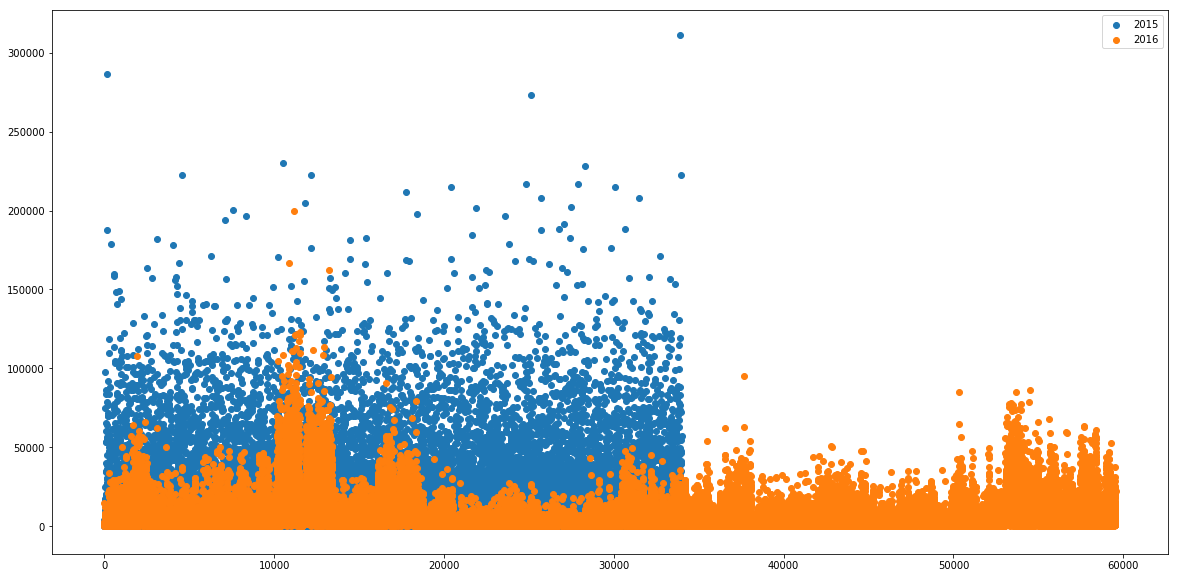

In [18]:
twosamplettest(payroll,2015, 2016, 'overtime_pay')